In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [6]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names) # Create a Pandas DataFrame from the data
cancer_df['target'] = cancer.target # Add the target variable to the DataFrame
cancer_df.head() # Display the first 5 rows of the DataFrame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
data = np.c_[cancer.data, cancer.target] # Combine the data and target variables into a single array
columns = np.append(cancer.feature_names, ['target']) # Add the target variable name to the list of feature names
df = pd.DataFrame(data=data, columns=columns) # Create a Pandas DataFrame from the combined data
x = df.drop('target', axis=1) # Drop the target variable from the DataFrame
y = df['target'] # Select the target variable


In [10]:
kmeans = KMeans(n_clusters=2) # Create a KMeans object with 2 clusters and a random state of 42
kmeans.fit(x) # Fit the KMeans object to the data

KMeans(n_clusters=2)

In [12]:
print(kmeans.cluster_centers_) # Print the cluster centers

[[1.25562991e+01 1.85703653e+01 8.11234703e+01 4.96061872e+02
  9.48844977e-02 9.10998174e-02 6.24377642e-02 3.34325434e-02
  1.78057991e-01 6.34540183e-02 3.04190868e-01 1.21515320e+00
  2.15288059e+00 2.37852922e+01 7.17326256e-03 2.34746895e-02
  2.87455128e-02 1.06363242e-02 2.06135799e-02 3.74750297e-03
  1.40439018e+01 2.47095434e+01 9.19375114e+01 6.19647945e+02
  1.29959110e-01 2.23311758e-01 2.19214947e-01 9.13298425e-02
  2.83553653e-01 8.32819406e-02]
 [1.93799237e+01 2.16945802e+01 1.28231298e+02 1.18592977e+03
  1.01294580e-01 1.48612977e-01 1.76939466e-01 1.00698779e-01
  1.91539695e-01 6.06029008e-02 7.42803817e-01 1.22253817e+00
  5.25058015e+00 9.56781679e+01 6.59868702e-03 3.21766947e-02
  4.24197710e-02 1.56739847e-02 2.03039695e-02 3.95338931e-03
  2.37094656e+01 2.89126718e+01 1.58496183e+02 1.75302290e+03
  1.40424733e-01 3.57757710e-01 4.49306107e-01 1.92431069e-01
  3.11881679e-01 8.61654962e-02]]


In [11]:
print(kmeans.cluster_centers_.shape) # Print the cluster centers

(2, 30)


In [14]:
print(kmeans.predict(x)) # Predict the cluster labels for the data
print(kmeans.inertia_) # Print the inertia (sum of squared distances to the closest cluster center

[1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 

In [16]:
all_inertia=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(x)
    all_inertia.append(kmeans.inertia_)

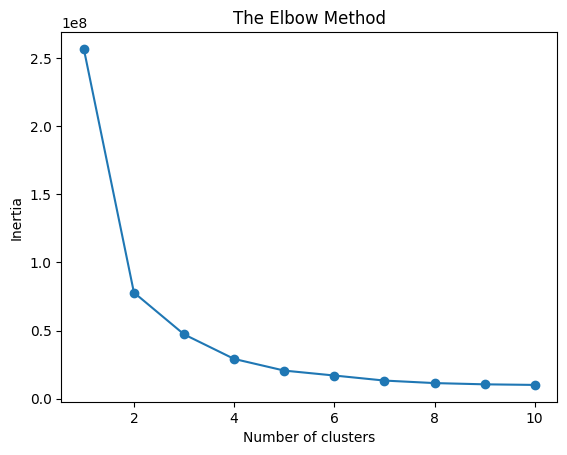

In [17]:
plt.plot(range(1,11), all_inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()